In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("car_data.csv")
data.head(5)

,bodystyle,derivative,doors,fueltype,make,mileage,model,price,geartype,fuel_capacity,weight,length,width,height,wheelbase,horsepower,enginesize,emission,torque,year
0,Hatchback,Se Tdi Dsg,5,Diesel,Volkswagen,2655,T-Roc,22995,Automatic,58,1485,4527,1814,1628,2791,108,1598,111,250,2020
1,Hatchback,1.2 SE 5dr,5,Petrol,Vauxhall,10,Corsa,13590,Manual,40,980,4060,1960,1433,2538,73,1229,118,118,2021
2,Estate,2.0 P400e R-Dynamic HSE 5dr Auto,5,Plug-in Hybrid,Land Rover,10,Range Rover Velar,68290,Automatic,69,2158,4797,2147,1683,2874,398,1997,56,640,2021
3,Hatchback,1.0T GDi Blue Drive Premium 5dr,5,Petrol,Hyundai,6497,Kona,14100,Manual,50,1223,4165,2070,1565,2600,118,998,146,172,2019
4,Hatchback,2.0 D165 R-Dynamic S 5dr 2WD,5,Diesel,Land Rover,343,Range Rover Evoque,43995,Manual,65,1712,4371,2100,1649,2681,163,1997,163,380,2021


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bodystyle      1033 non-null   object
 1   derivative     1033 non-null   object
 2   doors          1033 non-null   int64 
 3   fueltype       1033 non-null   object
 4   make           1033 non-null   object
 5   mileage        1033 non-null   int64 
 6   model          1033 non-null   object
 7   price          1033 non-null   int64 
 8   geartype       1033 non-null   object
 9   fuel_capacity  1033 non-null   int64 
 10  weight         1033 non-null   int64 
 11  length         1033 non-null   int64 
 12  width          1033 non-null   int64 
 13  height         1033 non-null   int64 
 14  wheelbase      1033 non-null   int64 
 15  horsepower     1033 non-null   int64 
 16  enginesize     1033 non-null   int64 
 17  emission       1033 non-null   int64 
 18  torque         1033 non-null

In [34]:
print(data['bodystyle'].unique())
print(data['fueltype'].unique())
print(data['make'].unique())
print(data['geartype'].unique())

['Hatchback' 'Estate' 'Station Wagon' 'SUV' 'Saloon' 'HATCHBACK'
 'Convertible' 'MPV' 'Coupe' 'ESTATE' 'SALOON' 'Cabriolet'
 '3 Door Hatchback' 'Suv' 'Roadster' 'Hardtop']
['Diesel' 'Petrol' 'Plug-in Hybrid' 'Electric' 'Hybrid' 'Hybrid Electric']
['Volkswagen' 'Vauxhall' 'Land Rover' 'Hyundai' 'Peugeot' 'Nissan' 'Kia'
 'Ford' 'BMW' 'Jaguar' 'Toyota' 'Alfa Romeo' 'Mercedes' 'Audi' 'Mini'
 'Citroen' 'Mazda' 'Seat' 'MG' 'Renault' 'Fiat' 'Mitsubishi' 'Honda'
 'Jeep' 'Skoda' 'Dacia' 'Suzuki' 'Volvo' 'Abarth']
['Automatic' 'Manual' 'Semi Automatic']


In [35]:
data['bodystyle'] = data["bodystyle"].map({
    'Hatchback': 'Hatchback',
    'Estate': 'Estate',
    'Saloon': 'Saloon',
    'Station Wagon': 'Station Wagon',
    'Coupe': 'Coupe',
    'SUV': 'SUV',
    'HATCHBACK': 'Hatchback',
    'Convertible': 'Convertible',
    'ESTATE': 'Estate',
    'MPV': 'MPV',
    'Suv': 'SUV',
    'Roadster': 'Roadster',
    'SALOON': 'Saloon',
    '4x4': 'SUV',
    'Cabriolet': 'Cabriolet',
    '3 Door Hatchback': 'Hatchback',
    'Hardtop': 'SUV'
})

In [36]:
bodystyle_mapping = {
    k: i
    for i, k in enumerate(data["bodystyle"].unique(), 0)
}
bodystyle_mapping

{'Hatchback': 0,
 'Estate': 1,
 'Station Wagon': 2,
 'SUV': 3,
 'Saloon': 4,
 'Convertible': 5,
 'MPV': 6,
 'Coupe': 7,
 'Cabriolet': 8,
 'Roadster': 9}

In [37]:
fueltype_mapping = {
    k: i
    for i, k in enumerate(data["fueltype"].unique(), 0)
}
fueltype_mapping

{'Diesel': 0,
 'Petrol': 1,
 'Plug-in Hybrid': 2,
 'Electric': 3,
 'Hybrid': 4,
 'Hybrid Electric': 5}

In [38]:
make_mapping = {
    k: i
    for i, k in enumerate(data["make"].unique(), 0)
}
make_mapping

{'Volkswagen': 0,
 'Vauxhall': 1,
 'Land Rover': 2,
 'Hyundai': 3,
 'Peugeot': 4,
 'Nissan': 5,
 'Kia': 6,
 'Ford': 7,
 'BMW': 8,
 'Jaguar': 9,
 'Toyota': 10,
 'Alfa Romeo': 11,
 'Mercedes': 12,
 'Audi': 13,
 'Mini': 14,
 'Citroen': 15,
 'Mazda': 16,
 'Seat': 17,
 'MG': 18,
 'Renault': 19,
 'Fiat': 20,
 'Mitsubishi': 21,
 'Honda': 22,
 'Jeep': 23,
 'Skoda': 24,
 'Dacia': 25,
 'Suzuki': 26,
 'Volvo': 27,
 'Abarth': 28}

In [39]:
model_mapping = {
    k: i
    for i, k in enumerate(data["model"].unique(), 0)
}
model_mapping

{'T-Roc': 0,
 'Corsa': 1,
 'Range Rover Velar': 2,
 'Kona': 3,
 'Range Rover Evoque': 4,
 'Discovery Sport': 5,
 '108': 6,
 'Micra': 7,
 'Picanto': 8,
 'Sportage': 9,
 'Focus': 10,
 'Astra': 11,
 'Defender': 12,
 '1 Series': 13,
 'XE': 14,
 'Fiesta': 15,
 'Leaf': 16,
 'Grandland X': 17,
 'Golf': 18,
 'Polo': 19,
 'X3': 20,
 '2 Series': 21,
 'Aygo': 22,
 'Tiguan Allspace': 23,
 'Mito': 24,
 'Qashqai': 25,
 'Range Rover Sport': 26,
 'A Class': 27,
 'Viva': 28,
 'Santa Fe': 29,
 'Ka+': 30,
 'Sorento': 31,
 '208': 32,
 'Z4': 33,
 'A7': 34,
 'Rio': 35,
 'Hatchback': 36,
 'E Class': 37,
 'Crossland X': 38,
 'Juke': 39,
 'X2': 40,
 'i10': 41,
 'A6': 42,
 'Soul': 43,
 'Crossland X ': 44,
 'C3': 45,
 'CX-5': 46,
 'Mii': 47,
 'Tiguan': 48,
 'Tucson': 49,
 '3008': 50,
 'Corsa E': 51,
 '308': 52,
 '3 Series': 53,
 'Adam': 54,
 'ZS': 55,
 'Clio': 56,
 'Ibiza': 57,
 'Niro': 58,
 '500': 59,
 'Meriva': 60,
 '2008': 61,
 'Countryman': 62,
 'Ateca': 63,
 'Xceed': 64,
 'Grand C-Max': 65,
 'Ecosport': 66,

In [40]:
geartype_mapping = {
    k: i
    for i, k in enumerate(data["geartype"].unique(), 0)
}
geartype_mapping

{'Automatic': 0, 'Manual': 1, 'Semi Automatic': 2}

In [41]:
data["bodystyle"] = data["bodystyle"].map(bodystyle_mapping)
data["geartype"] = data["geartype"].map(geartype_mapping)
data["model"] = data["model"].map(model_mapping)
data["make"] = data["make"].map(make_mapping)
data["fueltype"] = data["fueltype"].map(fueltype_mapping)

In [42]:
data.sample(10)

,bodystyle,derivative,doors,fueltype,make,mileage,model,price,geartype,fuel_capacity,weight,length,width,height,wheelbase,horsepower,enginesize,emission,torque,year
555,0,2.0 TDI 150 R-Line 3dr,3,0,0,23964,144,16490,1,55,1421,4288,1825,1488,2524,147,1968,119,340,2016
933,0,1.4 CRDi SR7 5dr,5,0,6,53000,80,6200,1,53,1375,4310,1780,1470,2650,89,1582,114,220,2015
18,0,118i [136] M Sport 5dr Step Auto,5,1,8,1827,13,29500,0,42,1320,4319,2081,1434,2670,134,1499,134,220,2021
318,0,1.4 [75] Energy 3dr,3,1,1,8725,1,9450,1,45,1166,4021,1944,1479,2510,73,1398,118,130,2018
491,0,1.5 EcoBlue 120 Zetec 5dr,5,0,7,3580,10,13650,1,47,1288,4378,1979,0,2700,118,1499,119,300,2018
362,0,1.0 EcoBoost ST-Line X 3dr,3,1,7,28751,15,14100,1,42,1144,4040,1941,1476,2493,98,998,108,170,2019
398,0,1.5 EcoBlue 120 ST-Line 5dr,5,0,7,20347,10,17800,1,47,1288,4387,1979,0,2700,118,1499,119,300,2020
317,0,118d Sport 5dr [Nav/Servotronic],5,0,8,24891,13,15890,1,52,1320,4324,1984,1421,2690,140,1995,115,320,2018
107,0,1.0 SE 5dr,5,1,17,26590,57,10000,1,45,1043,4061,1693,1445,2469,73,999,118,95,2017
26,0,1.2 Elite 5dr,5,1,1,10,1,14490,1,40,980,4060,1960,1433,2538,73,1229,118,118,2021


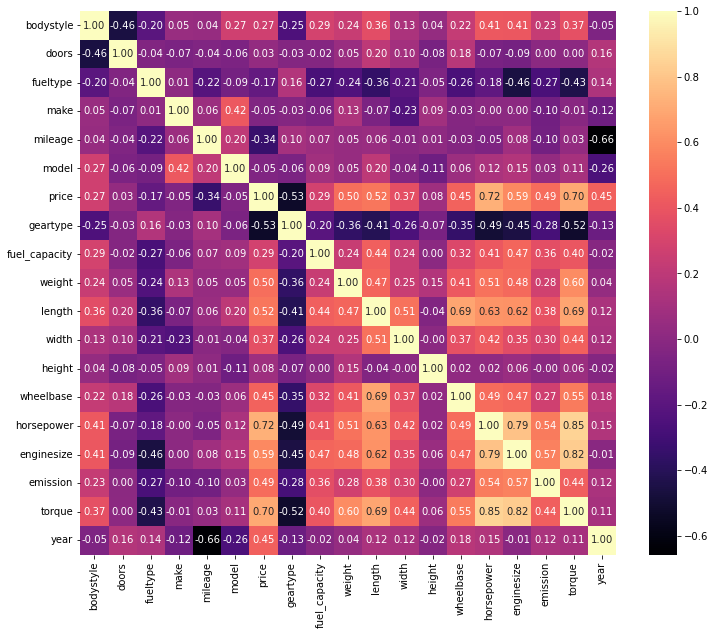

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f');

In [44]:
data.drop("derivative", axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [46]:
np.random.seed(42)

#Spltting the data to X & y
x = data.drop("price", axis=1)
y = data["price"]

#Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train.shape, x_test.shape

((826, 18), (207, 18))

In [47]:
#Instantiate the scaler 
scaler = StandardScaler()

#Fit the scaler to the train set
scaler.fit(x_train)

#Transform the train and test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [49]:
np.round(x_train_scaled.describe(), 1)

,bodystyle,doors,fueltype,make,mileage,model,geartype,fuel_capacity,weight,length,width,height,wheelbase,horsepower,enginesize,emission,torque,year
count,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.5,-3.3,-1.1,-1.1,-1.7,-1.2,-1.6,-2.5,-2.5,-7.0,-12.6,-2.8,-14.3,-1.5,-3.3,-4.2,-2.0,-4.0
25%,-0.5,0.4,-1.1,-0.9,-0.8,-0.9,-1.6,-0.3,-0.3,-0.7,-0.3,0.1,-0.5,-0.6,-0.7,-0.5,-0.7,-0.5
50%,-0.5,0.4,0.6,-0.1,-0.1,-0.3,0.6,-0.1,0.2,0.1,0.2,0.2,0.1,-0.1,-0.2,-0.1,-0.2,-0.0
75%,0.1,0.4,0.6,0.6,0.6,0.7,0.6,0.3,0.5,0.6,0.6,0.4,0.4,0.2,0.8,0.5,0.5,0.5
max,5.3,1.7,7.0,3.0,3.6,2.7,2.7,24.3,2.2,2.2,1.7,5.6,2.2,5.0,3.7,3.6,3.6,2.0


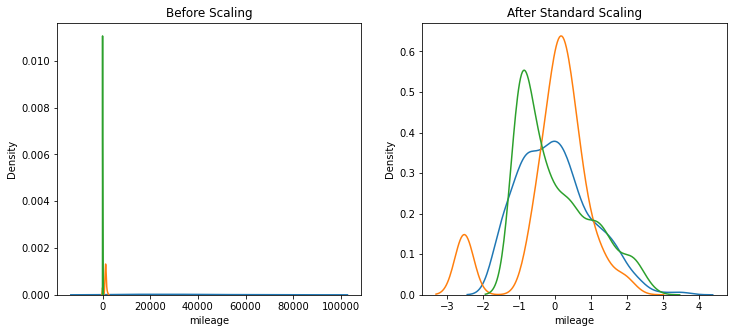

In [50]:
#Comparing the variable distribution before and after scaling 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['mileage'], ax=ax1)
sns.kdeplot(x_train['weight'], ax=ax1)
sns.kdeplot(x_train['model'], ax=ax1)

#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['mileage'], ax=ax2)
sns.kdeplot(x_train_scaled['weight'], ax=ax2)
sns.kdeplot(x_train_scaled['model'], ax=ax2)
plt.show()

In [51]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)

x_train_scaled = min_max_scaler.transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)

In [52]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

np.round(x_train.describe(), 1)

,bodystyle,doors,fueltype,make,mileage,model,geartype,fuel_capacity,weight,length,width,height,wheelbase,horsepower,enginesize,emission,torque,year
count,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0,826.0
mean,0.8,4.6,0.7,7.7,28190.5,57.8,0.7,52.2,1225.5,4295.1,1974.8,1402.8,2623.4,135.3,1589.3,129.0,252.4,2017.0
std,1.5,0.8,0.6,6.8,17011.7,50.1,0.5,20.6,485.6,325.9,140.9,494.7,183.2,53.8,477.1,30.6,124.8,2.0
min,0.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2004.0,194.0,0.0,0.0,54.0,0.0,0.0,0.0,2009.0
25%,0.0,5.0,0.0,1.2,14794.8,14.0,0.0,45.0,1088.0,4060.8,1932.0,1434.0,2538.0,103.0,1242.0,114.0,160.0,2016.0
50%,0.0,5.0,1.0,7.0,26910.0,41.0,1.0,50.0,1302.0,4324.0,2004.0,1484.0,2646.0,129.0,1499.0,125.0,230.0,2017.0
75%,1.0,5.0,1.0,12.0,38501.0,91.0,1.0,58.0,1485.0,4480.0,2065.0,1601.0,2690.0,147.0,1968.0,145.8,320.0,2018.0
max,9.0,6.0,5.0,28.0,89386.0,192.0,2.0,552.0,2311.0,5018.0,2220.0,4179.0,3022.0,404.0,3342.0,239.0,700.0,2021.0


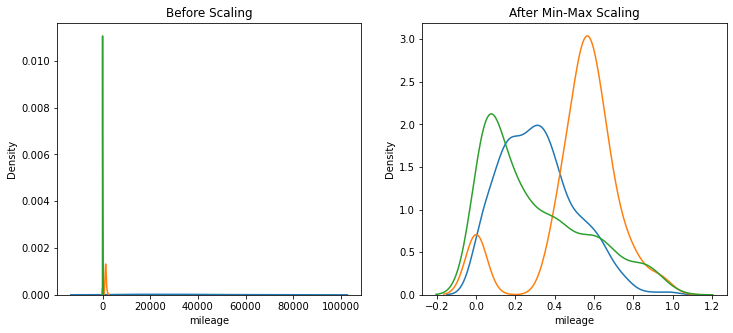

In [53]:
#Comparing the variable distribution before and after scaling 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['mileage'], ax=ax1)
sns.kdeplot(x_train['weight'], ax=ax1)
sns.kdeplot(x_train['model'], ax=ax1)

#after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(x_train_scaled['mileage'], ax=ax2)
sns.kdeplot(x_train_scaled['weight'], ax=ax2)
sns.kdeplot(x_train_scaled['model'], ax=ax2)
plt.show()

In [54]:
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Splitting the data into train, validation and test 

In [55]:
#Shuffle the data
data_shuffled = data.sample(frac=1)
#Splitting the data 
x = data_shuffled.drop("price", axis=1)
y = data_shuffled["price"]


#Set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state = 42)

#Set validation data set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)


print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))


x_train shape: (746, 18)
x_test shape: (155, 18)
y_train shape: (746,)
y_test shape: (155,)
x_val shape: (132, 18)
y_val shape: (132,)


In [56]:
rf = RandomForestRegressor(n_jobs=-1,random_state=42)
#Fit the model
rf.fit(data.drop("price", axis=1), data["price"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [57]:
rf.score(data.drop("price", axis=1), data["price"])

0.9672003717653767

#### Building an evaluation function

In [58]:
def show_scores(rf):
    train_preds = rf.predict(x_train)
    val_preds = rf.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val,val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds))}

    return scores

In [59]:
show_scores(rf)

{'Training MAE': 860.7867911591072,
 'Valid MAE': 956.1689960135923,
 'Training MSE': 4670239.931659178,
 'Valid MSE': 2740305.6672492134,
 'Training R^2': 0.9616615110096617,
 'Valid R^2': 0.9807572191100143,
 'Training RMSE': 2161.0737913498415,
 'Valid RMSE': 1655.3868633190289}

In [60]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features":[0.5, 1, "sqrt", "auto"] 
          }
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             n_iter=300,
                             cv=5,
                             verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=300,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
#Best Model Parameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 10}

In [62]:
#Evaluate the model
show_scores(rs_model)

{'Training MAE': 1521.0362283393897,
 'Valid MAE': 2656.504375024676,
 'Training MSE': 14626376.775531799,
 'Valid MSE': 18567882.148984347,
 'Training R^2': 0.8799305403613279,
 'Valid R^2': 0.8696139295501852,
 'Training RMSE': 3824.4446362225976,
 'Valid RMSE': 4309.046547553687}

In [63]:
ideal_rf_model = RandomForestRegressor(n_estimators=90,
                                       min_samples_split=6,
                                       min_samples_leaf=3,
                                       max_features='sqrt',
                                       max_depth=10,
                                       n_jobs=-1,
                                       max_samples=None,
                                       random_state=42)
ideal_rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [64]:
show_scores(ideal_rf_model)

{'Training MAE': 1650.5496337169536,
 'Valid MAE': 2752.745539507201,
 'Training MSE': 15802907.733172582,
 'Valid MSE': 20991731.70513508,
 'Training R^2': 0.8702722744421552,
 'Valid R^2': 0.852593344410091,
 'Training RMSE': 3975.2871258781524,
 'Valid RMSE': 4581.673461207714}

In [65]:
show_scores(rf)

{'Training MAE': 860.7867911591072,
 'Valid MAE': 956.1689960135925,
 'Training MSE': 4670239.931659178,
 'Valid MSE': 2740305.6672492134,
 'Training R^2': 0.9616615110096617,
 'Valid R^2': 0.9807572191100143,
 'Training RMSE': 2161.0737913498415,
 'Valid RMSE': 1655.3868633190289}

From the experiment carried out, the RandomForest baseline model outperfromed the tuned model. 

In [66]:
predictions = rf.predict(x_test)

c:\Users\David\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


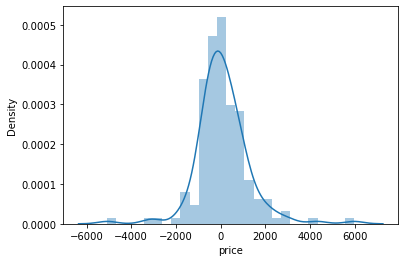

In [67]:
sns.distplot(y_test-predictions);

In [68]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 783.6164578690128
MSE: 1387316.99008632
RMSE: 1177.8442129952161


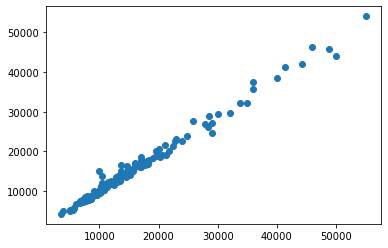

In [69]:
plt.scatter(y_test,predictions)

#### Prediction using Linear Regression

In [70]:
np.random.seed(42)

lr_model = LinearRegression(n_jobs=-1)
#Fit the model
lr_model.fit(data.drop("price", axis=1), data["price"])

LinearRegression(n_jobs=-1)

In [71]:
lr_model.score(data.drop("price", axis=1), data["price"])

0.7301053790101506

In [72]:
def show_scores(lr_model):
    train_preds = lr_model.predict(x_train)
    val_preds = lr_model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val,val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds))
              }

    return scores

In [73]:
show_scores(lr_model)

{'Training MAE': 3141.7946043706875,
 'Valid MAE': 3561.1911365261344,
 'Training MSE': 35892319.418665156,
 'Valid MSE': 33511123.274210136,
 'Training R^2': 0.7053561887598063,
 'Valid R^2': 0.7646805572641684,
 'Training RMSE': 5991.0198980361565,
 'Valid RMSE': 5788.8792761820605}

#### Predictions with different models 

In [74]:
import xgboost as xgb
from xgboost import XGBRegressor

In [75]:
models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree Regressor": DecisionTreeRegressor(),
          "Lasso": Lasso(),
          "SVM": LinearSVR(),
          "XGBoost": XGBRegressor()}
def fit_score(models, x_train, x_test, y_train, y_test):
    
    #Set Random Seed
    np.random.seed(42)
    
    #Dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        #Fit the model
        model.fit(x_train, y_train)
        #Evaluate the model
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [76]:
model_scores = fit_score(models=models,
                        x_train=x_train,
                        x_test=x_test,
                        y_train = y_train,
                        y_test=y_test)
model_scores

c:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\David\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Logistic Regression': 0.0064516129032258064,
 'Decision Tree Regressor': 0.7511747183302476,
 'Lasso': 0.8265742072084995,
 'SVM': 0.7198450675007757,
 'XGBoost': 0.8931362453221527}

#### Model Comparison


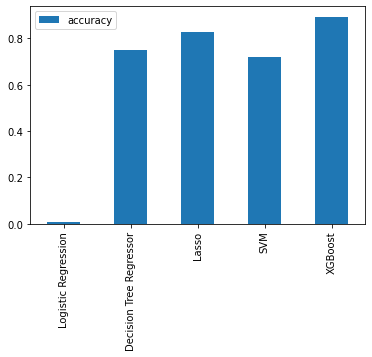

In [77]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [78]:
np.random.seed(42)
las = Lasso()
#Fit the model
las.fit(data.drop("price", axis=1), data["price"])

Lasso()

In [79]:
las.score(data.drop("price", axis=1), data["price"])

0.7301052413482759

In [80]:
def show_scores(las):
    train_preds = las.predict(x_train)
    val_preds = las.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val,val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds))}

    return scores

In [81]:
show_scores(las)

{'Training MAE': 3141.640934480585,
 'Valid MAE': 3561.115593317187,
 'Training MSE': 35893334.831120215,
 'Valid MSE': 33508859.280819632,
 'Training R^2': 0.7053478531325583,
 'Valid R^2': 0.7646964553186338,
 'Training RMSE': 5991.104641977155,
 'Valid RMSE': 5788.683726100402}

In [82]:
np.random.seed(42)
xgbr = XGBRegressor()
#Fit the model
xgbr.fit(data.drop("price", axis=1), data["price"])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
xgbr.score(data.drop("price", axis=1), data["price"])

0.9992502285122539

In [84]:
def show_scores(xgbr):
    train_preds = xgbr.predict(x_train)
    val_preds = xgbr.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val,val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_val, val_preds))}

    return scores

In [85]:
show_scores(xgbr)

{'Training MAE': 191.8249652443239,
 'Valid MAE': 193.1003399473248,
 'Training MSE': 78281.87102711976,
 'Valid MSE': 82225.43725196927,
 'Training R^2': 0.999357375917633,
 'Valid R^2': 0.9994226023426754,
 'Training RMSE': 279.78897588561233,
 'Valid RMSE': 286.74978160753545}

In [86]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [87]:
%%time
param_grid = dict( n_jobs=[-1],
                   learning_rate=[0.1, 0.5],
                   objective=['reg:squarederror'],
                   max_depth=[5, 10, 15], 
                   n_estimators=[100, 500, 1000],
                   subsample=[0.2, 0.8, 1.0],
                   gamma=[0.05, 0.5],
                   scale_pos_weight=[0, 1],
                   reg_alpha=[0, 0.5],
                   reg_lambda=[1, 0],)

xgbr_model = XGBRegressor(random_state=42, verbosity=1)

rs_xgbr = GridSearchCV(estimator=xgbr_model,
                       param_grid=param_grid,
                       scoring='neg_root_mean_squared_error')

best_model = rs_xgbr.fit(x_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'n_jobs': -1, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 0, 'subsample': 0.2}
Wall time: 45min 41s


In [88]:
regressor = XGBRegressor(gamma=0.05,
                         learning_rate=0.1,
                         max_depth=5,
                         n_estimators=100,
                         n_jobs=-1,
                         objective='reg:squarederror',
                         subsample=0.8,
                         scale_pos_weight=0,
                         reg_alpha=0.5,
                         reg_lambda=1)
model = regressor.fit(x_train, y_train)

In [89]:
show_scores(regressor)

{'Training MAE': 786.4861841278486,
 'Valid MAE': 2543.5208925189395,
 'Training MSE': 1180378.3214061446,
 'Valid MSE': 16320809.44910812,
 'Training R^2': 0.9903101506685147,
 'Valid R^2': 0.8853931647371095,
 'Training RMSE': 1086.4521717066723,
 'Valid RMSE': 4039.9021583583085}

In [90]:
y_preds = xgbr.predict(x_test)

In [91]:
print('MAE:', mean_absolute_error(y_test, y_preds))
print('MSE:', mean_squared_error(y_test, y_preds))
print('R^2:', r2_score(y_test, y_preds))

MAE: 226.87716103830644
MSE: 152085.95226779446
R^2: 0.998300007679995


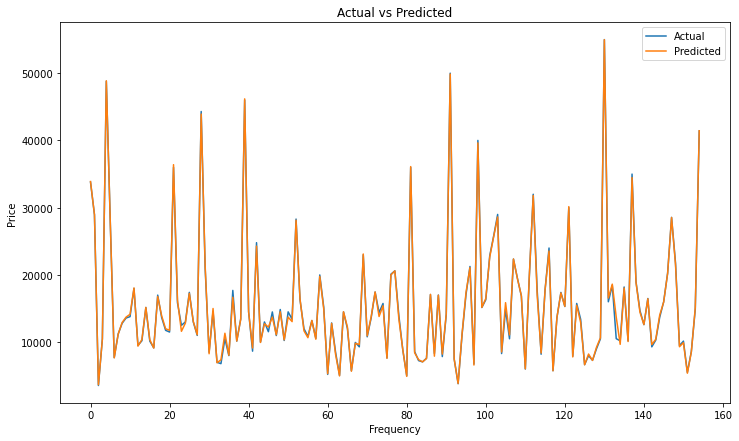

In [104]:
fig= plt.figure(figsize=(12,7))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Actual")
plt.plot(x_ax, y_preds, label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.legend()
plt.show()

In [105]:
fig= plt.figure(figsize=(12,7))
x_ax = range(len(y_test))
pd.crosstab(x_ax, y_test, label="Actual")
pd.crosstab(x_ax, y_preds, label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.legend()
plt.show()

TypeError: crosstab() got an unexpected keyword argument 'label'

<Figure size 864x504 with 0 Axes>

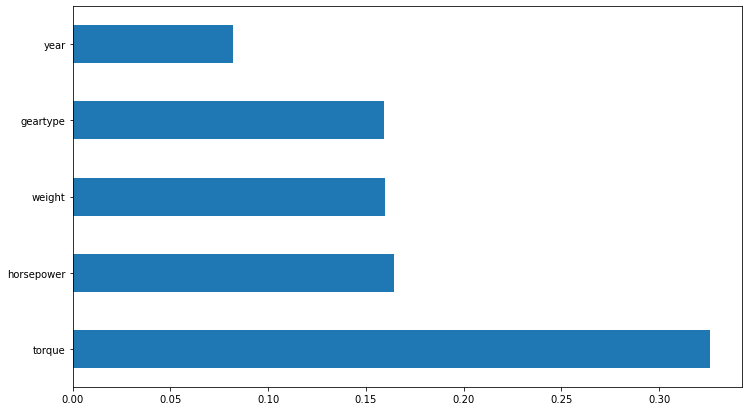

In [94]:
fig= plt.figure(figsize=(12,7))
feat_importances = pd.Series(xgbr.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [95]:
rf_preds = rf.predict(x_test)
print('MAE:', mean_absolute_error(y_test, rf_preds))
print('MSE:', mean_squared_error(y_test, rf_preds))
print('R^2:', r2_score(y_test, rf_preds))

MAE: 783.6164578690128
MSE: 1387316.99008632
R^2: 0.9844927937564781


In [96]:
lr_preds = lr_model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, lr_preds))
print('MSE:', mean_squared_error(y_test, lr_preds))
print('R^2:', r2_score(y_test, lr_preds))

MAE: 2833.9300410827263
MSE: 14291147.997125857
R^2: 0.8402558456129509


In [97]:
las_preds = las.predict(x_test)
print('MAE:', mean_absolute_error(y_test, las_preds))
print('MSE:', mean_squared_error(y_test, las_preds))
print('R^2:', r2_score(y_test, las_preds))

MAE: 2833.2282616291614
MSE: 14288298.917419853
R^2: 0.8402876921677909


In [98]:
#pickle.dump(xgbr, open("xgboost_car_price_pred_model1.pkl", "wb"))

In [99]:
#loaded_pickle_model = pickle.load(open("xgboost_car_price_pred_model1.pkl", "rb"))

In [100]:
#pickle_ypreds = loaded_pickle_model.predict(x_test)
#show_scores(xgbr)